**Importing required libraries**

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
import seaborn as sns

**Connecting to google drive to access the file, where the data is saved.**

In [79]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Accessing the csv file where the loan details are saved.**

In [80]:
loan_data = pd.read_csv('drive/MyDrive/Samples/AI ML/Module 2/loan.csv')
loan_data.head()

<ipython-input-80-29b69ffc9acf>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('drive/MyDrive/Samples/AI ML/Module 2/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [81]:
na_columns = loan_data.isna().sum().loc[lambda x : x > 0]

# Data cleaning

Looking at the data, some columns seems to have NA values. Lets check how many columns has all null values and delete them

In [82]:
len(na_columns.loc[lambda x : x == 39717])

54

In [83]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(na_columns.sort_values(ascending=True))

last_credit_pull_d                    2
title                                11
tax_liens                            39
revol_util                           50
collections_12_mths_ex_med           56
chargeoff_within_12_mths             56
last_pymnt_d                         71
pub_rec_bankruptcies                697
emp_length                         1075
emp_title                          2459
desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_accts_ever_120_pd             39717
mort_acc                          39717
mths_since_recent_inq             39717
mths_since_recent_bc_dlq          39717
mths_since_recent_bc              39717
num_bc_tl                         39717
mths_since_recent_revol_delinq    39717
num_il_tl                         39717


In [84]:
loan_data.shape

(39717, 111)

**Remove columns which has all null values**

In [85]:
loan_data = loan_data.dropna(how='all',axis=1)
loan_data.shape

(39717, 57)

In [86]:
loan_data.isna().sum().loc[lambda x : x > 0]

emp_title                      2459
emp_length                     1075
desc                          12940
title                            11
mths_since_last_delinq        25682
mths_since_last_record        36931
revol_util                       50
last_pymnt_d                     71
next_pymnt_d                  38577
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

**Analysing emp_title column. fill the empty values with empty space**

In [87]:
loan_data['emp_title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_title
Non-Null Count  Dtype 
--------------  ----- 
37258 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [88]:
loan_data['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [89]:
loan_data['emp_title'] = loan_data['emp_title'].fillna('')

**Converting the column type to string**

In [90]:
loan_data['emp_title'] = loan_data['emp_title'].astype('string')
loan_data['emp_title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_title
Non-Null Count  Dtype 
--------------  ----- 
39717 non-null  string
dtypes: string(1)
memory usage: 310.4 KB


**Int_rate column has % in text. We need to remove it**

In [91]:
loan_data['int_rate'].apply(lambda x : x.replace('%',''))

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [92]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : x.replace('%',''))

**Set int_rate column dtype to float**

In [93]:
loan_data['int_rate'] = loan_data['int_rate'].astype('float')
loan_data['int_rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
39717 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


**It seems pymnt_plan has only one value 'n'. Lets check**

In [94]:
loan_data['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

**Removing pymnt_plan column, since it will not help us in analysing data**

In [95]:
loan_data = loan_data.drop('pymnt_plan',axis=1)

In [96]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype=

**url column just contains the https://lendingclub.com/browse/loanDetail.action?loan_id=[id]. We can remove this**

In [97]:
loan_data = loan_data.drop('url',axis=1)

In [98]:
loan_data.shape

(39717, 55)

**initial_list_status has only one value f. We can remove this column too**

In [99]:
loan_data['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [100]:
loan_data = loan_data.drop('initial_list_status',axis=1)

**Seems policy_code has only value 1. Lets check, if true lets delete it**

In [101]:
loan_data['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [102]:
loan_data = loan_data.drop('policy_code',axis=1)

**collections_12_mths_ex_med column has only 0 or NA values. We can remove this column**

In [103]:
loan_data['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [104]:
loan_data = loan_data.drop('collections_12_mths_ex_med',axis=1)

**application_type has only one value INDIVIDUAL. We can remove this column**

In [105]:
loan_data['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [106]:
loan_data = loan_data.drop('application_type',axis=1)

In [107]:
loan_data.shape

(39717, 51)

**acc_now_delinq column has only one value 0. We can remove this column too.**

In [108]:
loan_data['acc_now_delinq'].value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [109]:
loan_data = loan_data.drop('acc_now_delinq',axis=1)

**delinq_amnt column has only one value 0. We can remove this column too.**

In [110]:
loan_data['delinq_amnt'].value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [111]:
loan_data = loan_data.drop('delinq_amnt',axis=1)

**term column has values '36 months' and '60 months'. We can remove ' months' and convert the column type to integer.**

In [112]:
loan_data['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [113]:
loan_data['term'] = loan_data['term'].apply(lambda x : x.replace(' months',''))

In [114]:
loan_data['term'].describe()

count     39717
unique        2
top          36
freq      29096
Name: term, dtype: object

**All id and member_id values are unique, these columns are not useful for us in the analysis**

In [115]:
len(loan_data.id.unique())

39717

In [116]:
len(loan_data.member_id.unique())

39717

In [117]:
loan_data = loan_data.drop(['id','member_id'],axis=1)

**tax_liens has only a value of 0, so we can remove this column. Also, zip_code will not be useful in our analysis. we can dro this column**

In [118]:
loan_data['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [119]:
loan_data = loan_data.drop(['tax_liens','zip_code'],axis=1)

In [120]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies'],
      dtype='object')

Got to know of the DataFrame.var() which gives us the variation of the values in a column. This will help us in finding columns which only one value.

In [121]:
loan_data.var()

<ipython-input-121-29a7da735fb2>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_data.var()


loan_amnt                   5.560194e+07
funded_amnt                 5.165640e+07
funded_amnt_inv             5.081481e+07
int_rate                    1.387432e+01
installment                 4.362871e+04
annual_inc                  4.069645e+09
dti                         4.460361e+01
delinq_2yrs                 2.418786e-01
inq_last_6mths              1.145369e+00
mths_since_last_delinq      4.848830e+02
mths_since_last_record      1.920414e+03
open_acc                    1.936249e+01
pub_rec                     5.626382e-02
revol_bal                   2.523338e+08
total_acc                   1.299990e+02
out_prncp                   1.407547e+05
out_prncp_inv               1.397447e+05
total_pymnt                 8.175850e+07
total_pymnt_inv             7.997139e+07
total_rec_prncp             4.992160e+07
total_rec_int               6.802248e+06
total_rec_late_fee          5.314380e+01
recoveries                  4.743694e+05
collection_recovery_fee     2.210324e+04
last_pymnt_amnt 

**chargeoff_within_12_mths has only 0 as value. We can remove this column**

In [122]:
loan_data = loan_data.drop(['chargeoff_within_12_mths'],axis=1)

In [123]:
loan_data.shape

(39717, 44)

**Even delinq_2yrs, pub_rec_bankruptcies and pub_rec has very low variance, we can remove these columns.**

In [124]:
loan_data['delinq_2yrs'].value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [125]:
loan_data['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [126]:
loan_data['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [127]:
loan_data = loan_data.drop(['delinq_2yrs','pub_rec','pub_rec_bankruptcies'],axis=1)

desc has multi-line content. This will not help us in analysis. This can be deleted.

In [128]:
loan_data = loan_data.drop('desc',axis=1)

title column has junk values. We can remove this column

In [129]:
loan_data = loan_data.drop('title',axis=1)

In [130]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

Issue date doesn't correspond to customer's ability to pay loan. So we can remove earliest_cr_line and issue_d.

*   issue_d - The month which the loan was funded. This info is not needed to issue future loans
*   earliest_cr_line - The month the borrower's earliest reported credit line was opened



### Post behavioural info

Info in the below columns is related to the behaviour of the customer after taking the loan. This information is not useful for the analysis, since we cant predict the customer behaviour before giving the loan

*   funded_amnt - The total amount committed to that loan at that point in time.
*   funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
*   open_acc - This is no of pre-approved loans the customer has with the bank. This info is not needed, since if the customer already has preapproved loans, bank can already provide the loan.
*   out_prncp - Remaining outstanding principal for total amount funded
*   out_prncp_inv - This is similar info, not required for analysis
*   recoveries - post charge off gross recovery
*   revol_bal - Total credit revolving balance
*   revol_util -Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
*   total_rec_int - Interest received to date
*   total_rec_late_fee - Late fees received to date
*   total_rec_prncp - Principal received to date
*   next_pymnt_d - Next scheduled payment date
*   inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
*   last_pymnt_amnt - Last total payment amount received
*   last_pymnt_d - Last month payment was received
*   mths_since_last_delinq - The number of months since the borrower's last delinquency.
*   collection_recovery_fee - post charge off collection fee
*   dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.




In [132]:
loan_data = loan_data.drop(['issue_d','earliest_cr_line','funded_amnt','funded_amnt_inv','open_acc','out_prncp','out_prncp_inv','recoveries','revol_bal','revol_util','total_rec_int','total_rec_late_fee','total_rec_prncp','next_pymnt_d','inq_last_6mths','last_pymnt_amnt','last_pymnt_d','mths_since_last_delinq','collection_recovery_fee','dti'],axis=1)

In [135]:
loan_data.shape

(39717, 19)

Coumns


---



Sequential
loan_amnt, annual_inc, ( can be considered as categorical)


---



Categorical

Ordered
grade,sub_grade,emp_length,

Un-ordered
Term,emp_title,home_ownership,verification_status,purpose,addr_state

In [ ]:
#plt.hist(x='annual_inc',bins=)
#sns.boxplot(x='annual_inc',data=loan_data)
loan_data.annual_inc.info()

<Axes: xlabel='annual_inc', ylabel='Count'>

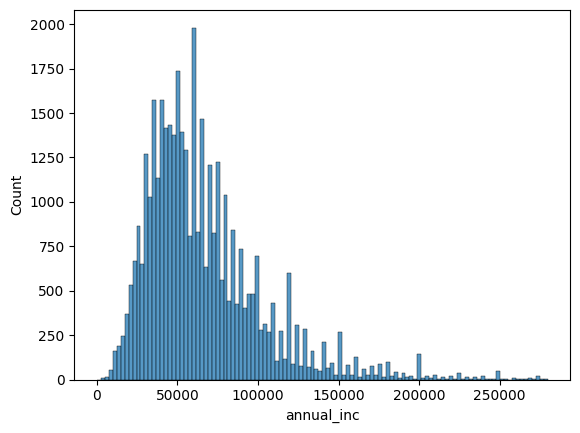

In [137]:
sns.histplot(x=loan_data['annual_inc'],binrange=(0,280000))

In [ ]:
sns.countplot(x=loan_data['loan_status'])
#loan_data[loan_data['int_rate'] > 22.5]['loan_status']

In [ ]:
sns.countplot(x=loan_data['verification_status'])

In [ ]:
sns.boxplot(x="verification_status", y="loan_amnt",
            hue="loan_status", palette=["m", "g","y"],
            data=loan_data)
#sns.boxplot(data=loan_data,hue=['verification_status','loan_amnt'],x='loan_amnt')
#loan_data.groupby(by='verification_status')['loan_status']

In [ ]:
loan_data['annual_inc'].sort_values(ascending=False)

In [ ]:
sns.displot(x='annual_inc',data=loan_data,binrange=(0,200000),bins=60)

In [ ]:
sns.displot(data=loan_data,x='annual_inc',log_scale=True)

In [ ]:
loan_data_inc_rem_outlier = loan_data[loan_data['annual_inc'] < 128000]
loan_data_inc_rem_outlier.shape
sns.boxplot(y=loan_data_inc_rem_outlier['annual_inc'],x=loan_data_inc_rem_outlier['loan_status'],hue=loan_data_inc_rem_outlier[''])

In [ ]:
sns.catplot(data=loan_data,y=loan_data_inc_rem_outlier['grade'],x=loan_data_inc_rem_outlier['loan_status'],kind=)